In [2]:
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

In [18]:
import matplotlib.pyplot as plt

The following lines of python code can be elaborated as. First we build a network (20x20) with a weights format taken from the raw_data and activate Periodic Boundary Conditions. Then we train the network for 10000 epochs and with initial learning rate of 0.01. We then save the weights to file and print a map of the network nodes and color them according to the first feature (column number 0) of the data-set and then according to the distance between each node and its neighbors. Then we project the data points on the new 2D network map. Finally we use k means to cluster the data points into two clusters which we hope to separate the data points into fraudulent cluster and non-fraudulent cluster.

In [3]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [8]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [9]:
train = df[df.columns[:-1]].values[:500]

In [10]:
net = sps.somNet(20, 20, train, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [11]:
net.train(0.01, 1000)

Training SOM... done!


In [12]:
net.save('filename_weights')

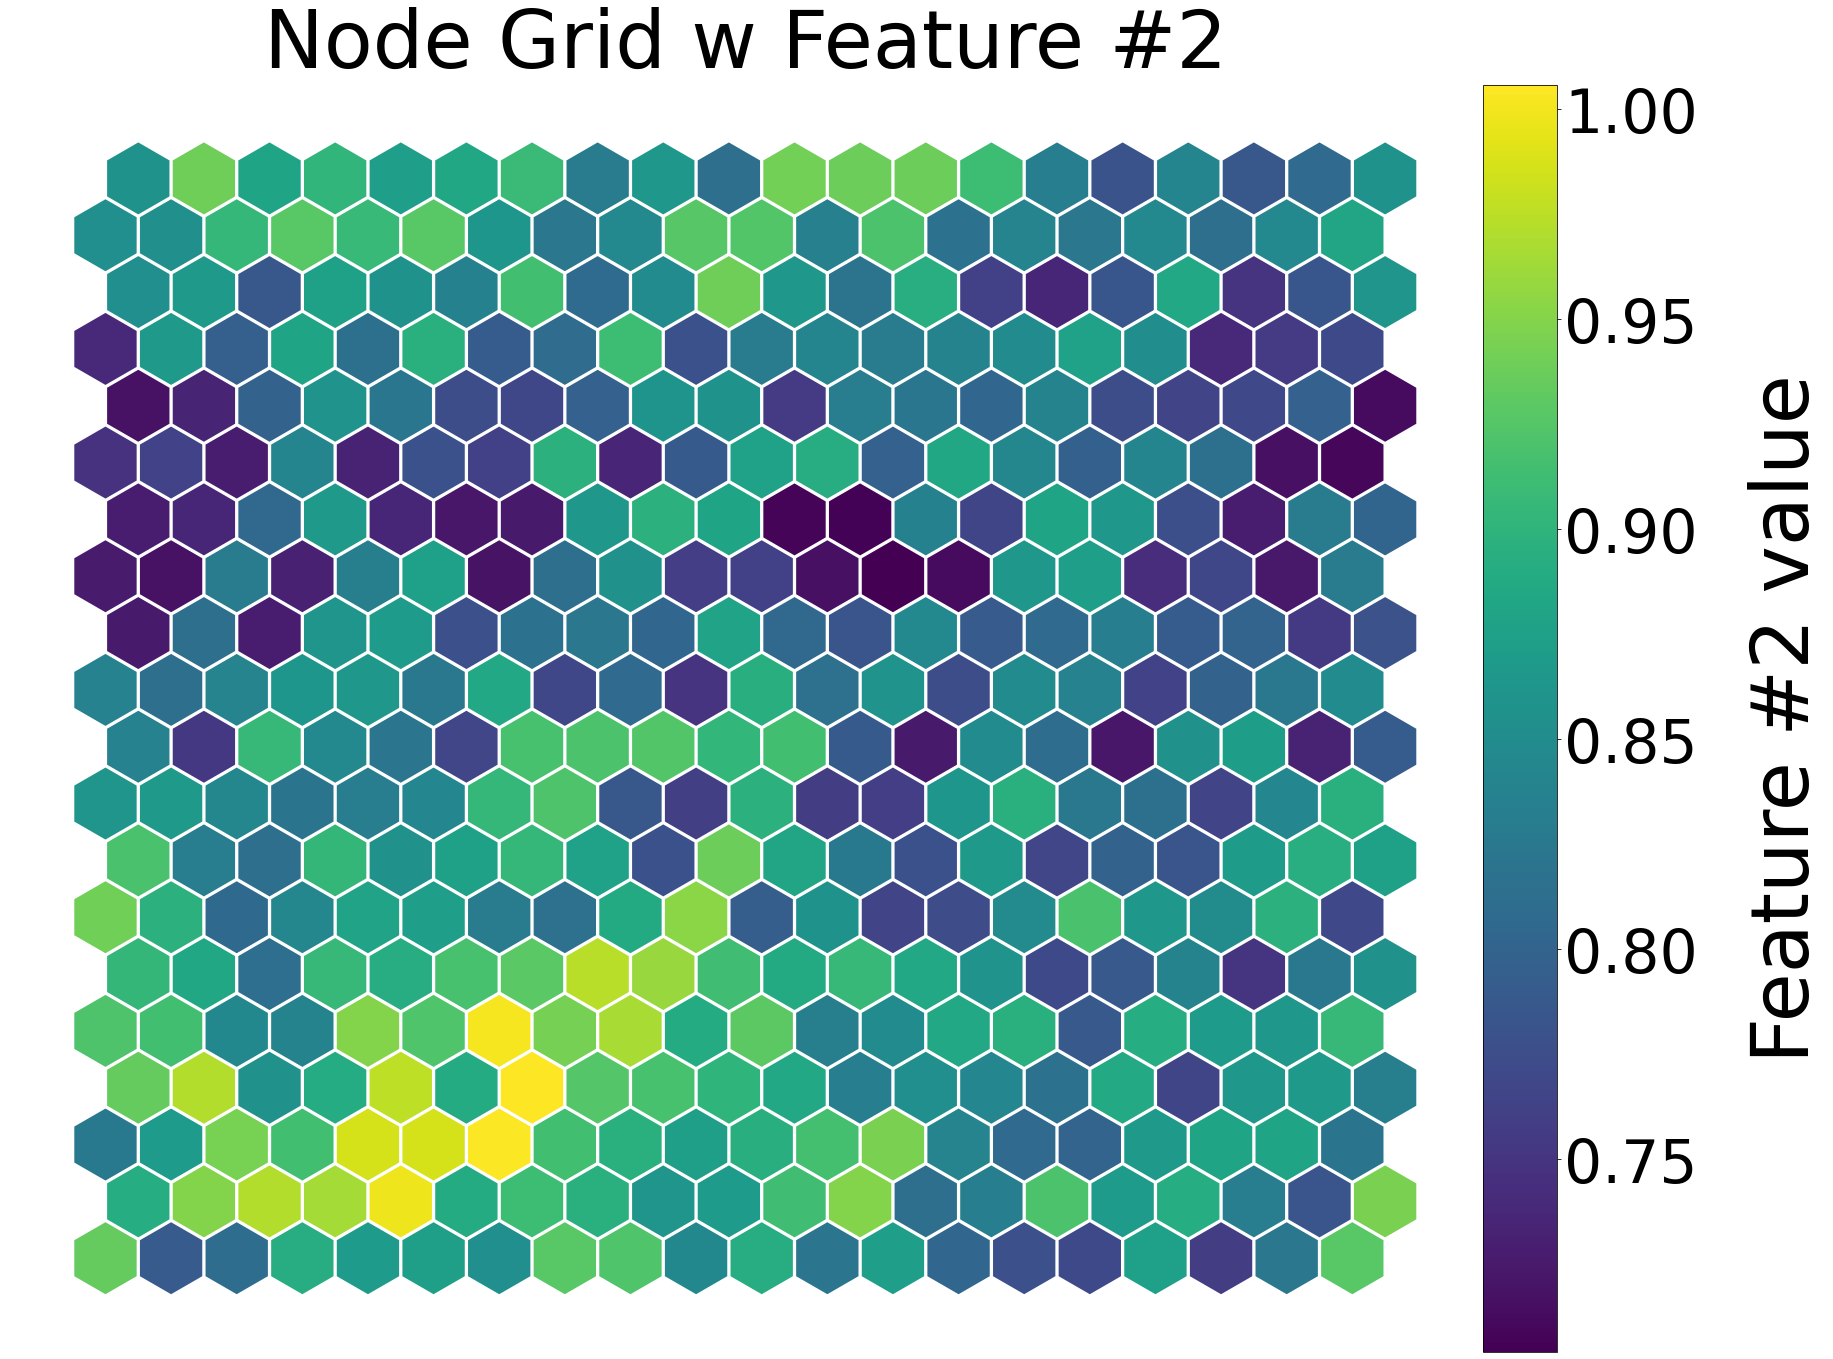

In [14]:
net.nodes_graph(colnum=2)

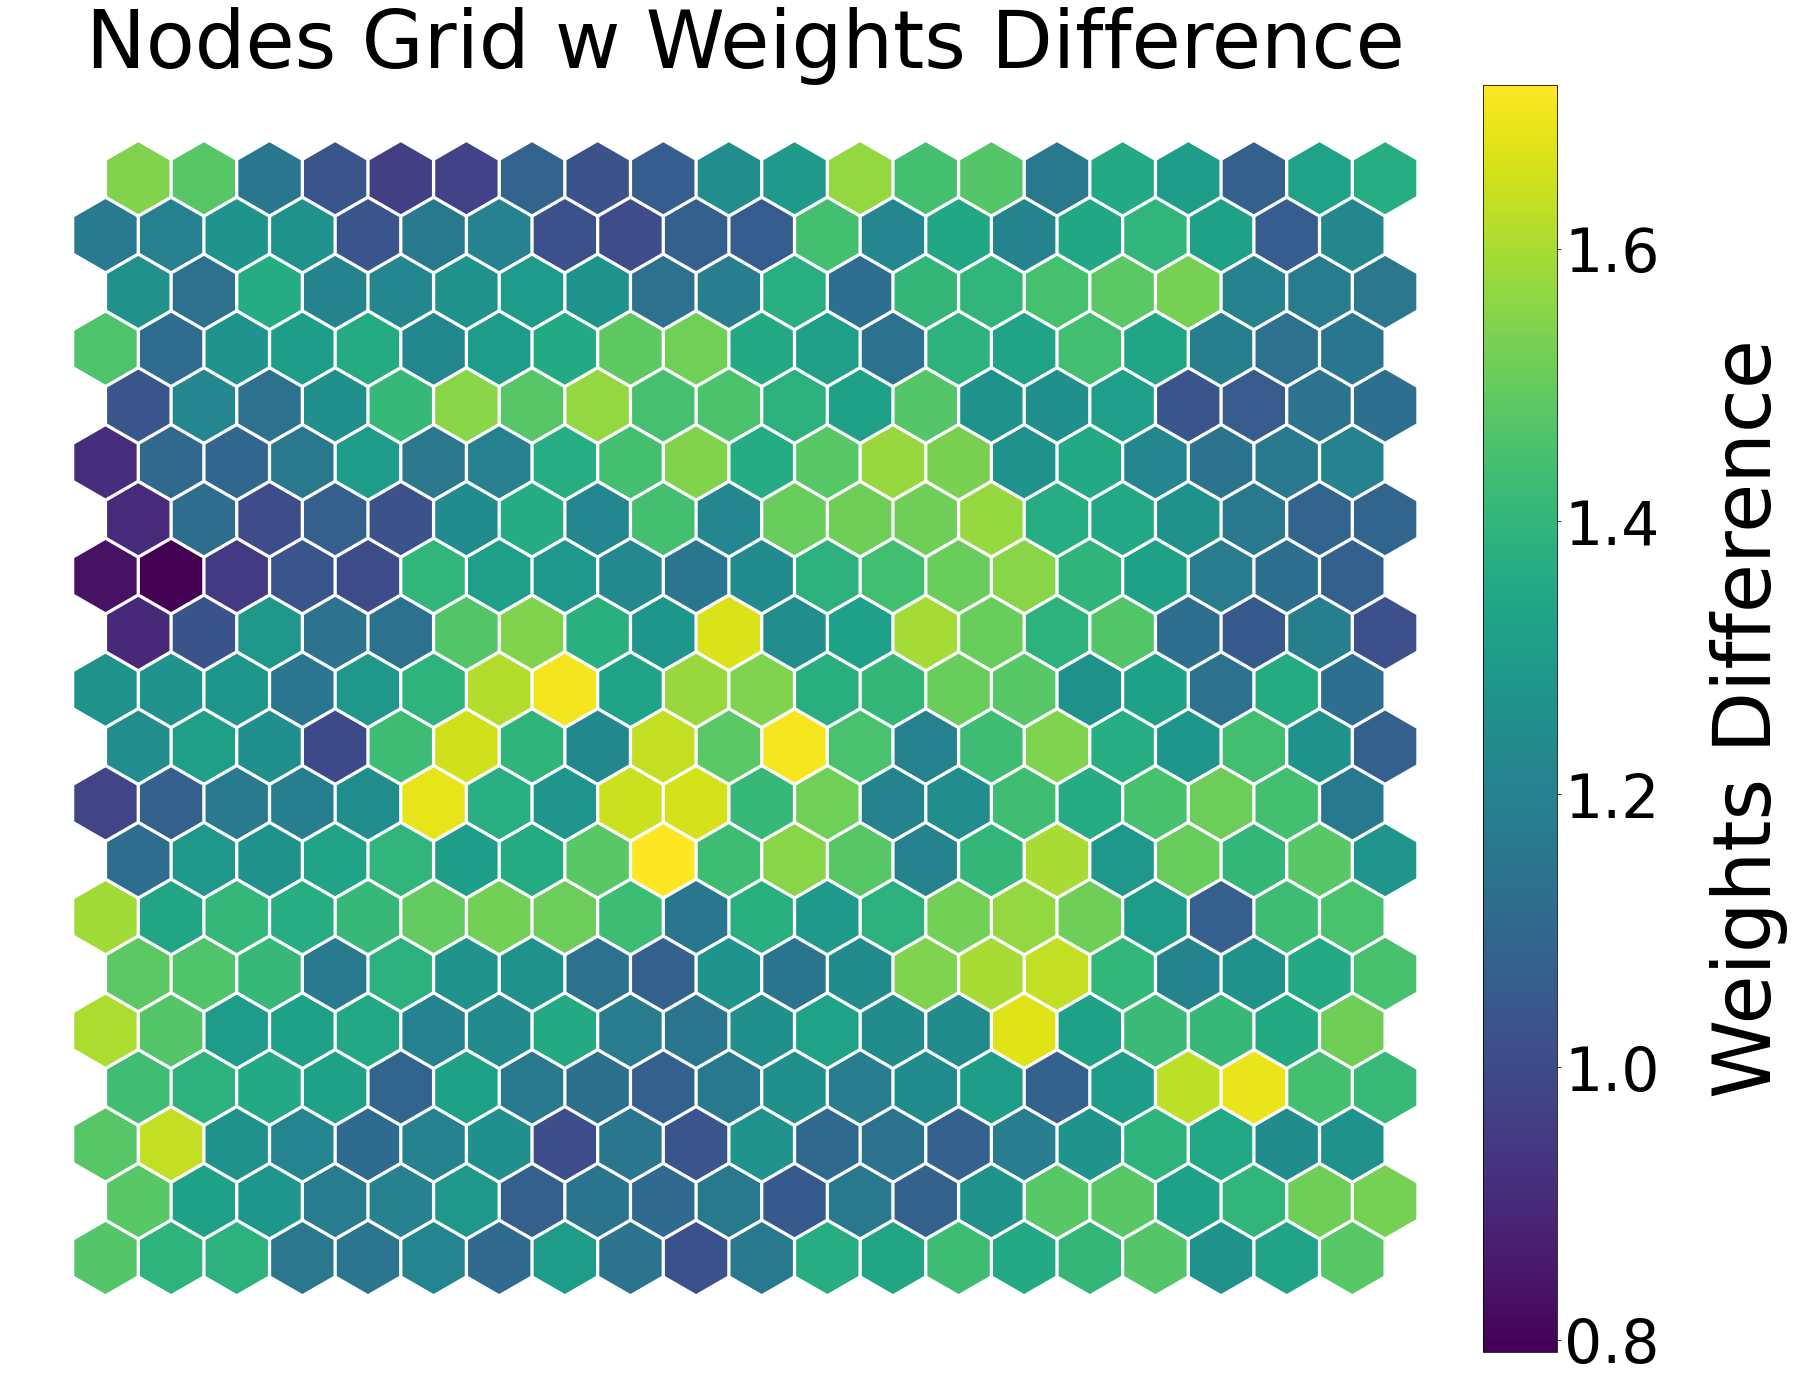

In [15]:
net.diff_graph()

In [16]:
prj = np.array(net.project(train))

<Figure size 432x288 with 0 Axes>

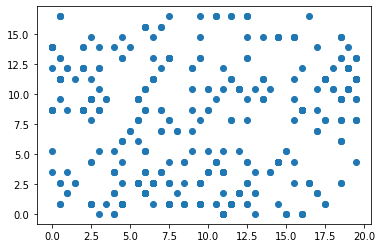

In [20]:
plt.scatter(prj.T[0], prj.T[1])
plt.show()